<a href="https://colab.research.google.com/github/sandro003/MVP2/blob/main/An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##INTRODUÇÃO:

A expectativa de vida em um determinado país está bastante relacionada com a qualidade de vida que um indivíduo possui, já que fatores como educação, saúde, assistência social, segurança, guerras e conflitos internos influenciam-na diretamente. Este notebook busca abordar essas lacunas desenvolvendo um conjunto de dados abrangentes, sem análises de valores ausentes, utilizando dados de muitos anos de 193 países diferentes permitindo que os países priorizem atuações que poderiam melhorar mais efetivamente a saúde e a expectativa de vida de suas populações.
Com base acima entendi que o problema "Conjunto de dados de expectativa de vida dos países" seria um problema supervisionado uma vez que usam dados brutos com rótulos significativos e levei como premissa "A qualidade de vida está diretamente ligada a longevidade do indivíduo". Lembrando que os dados foram selecionados baseando-se nas consistências dos mesmos.

#ATRIBUTOS DO DATASET:
Country: nome do país.

Year: ano da análise.

Status: status do país (variável binária).

Life expectancy: expectativa média de vida.

Adult mortality: probabilidade de morrer entre 15 e 60 anos por 1.000
habitantes.

Infant deaths: mortes infantis por 1.000 bebês.

Alcohol: consumo individual médio de álcool puro entre pessoas com mais de 15
anos.

Percentage expenditure: porcentagem do PIB per capita gasto em assistência
médica.

Hepatitis B: cobertura de imunização contra hepatite B entre crianças de 1 ano
em porcentagem.

Measles: número relatado de casos de sarampo por 1.000 pessoas.

BMI: IMC médio de toda a população.

Under-five deaths: número de mortes de menores de cinco anos por 1.000 pessoas.

Polio: cobertura de imunização contra pólio entre crianças de 1 ano em
porcentagem.

Total expenditure: despesa geral do governo com saúde como uma porcentagem da despesa total do governo.

Diphtheria: cobertura de imunização contra difteria entre crianças de 1 ano em porcentagem.

HIV/AIDS: mortes escalonadas por 1.000 nascidos vivos por HIV/AIDS.

GDP: PIB de cada país em USD.

Population: população total do país.

Thinness 1-19 years: prevalência de magreza entre crianças e adolescentes de 10 a 19 anos em porcentagem.

Thinness 5-9 years: prevalência de magreza entre crianças de 5 a 9 anos em porcentagem.

Income composition of resources: índice de desenvolvimento humano (IDH) em termos de composição de renda dos recursos.

Schooling: número médio de anos na escola.

PREPARANDO O AMBIENTE PARA CRIAÇÃO DO MVP ANÁLISE DE DADOS E BOAS PRÁTICAS

In [12]:
from google.colab import drive
drive.mount('/content/drive'),

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(None,)

In [13]:
# Biblioteca responsável por fazer a leitura e impressão da base de dados
import pandas as pd #Importando PANDAS e criando alias para facilitar na digitação
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # para gerar gráficos mais atrativos com códigos mais limpos e mais simples.
from scipy.stats import pearsonr
import copy

In [14]:
#Realizando a importação do arquivo csv
# Ler o arquivo csv
df = pd.read_csv('https://raw.githubusercontent.com/sandro003/MVP2/refs/heads/main/expectativdevida.csv')

In [15]:
# Visualizando o arquivo
display(df.head(500))  # Print the first few rows of the DataFrame

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,1.621762,-0.459399,-0.443691,0.790238,0.268824,-1.133571,-0.335570,-0.635971,-0.110384,...,-3.268019,0.889486,-0.730578,-0.323445,-0.483546,0.343993,2.796805,2.757185,-0.704483,-0.563614
1,Afghanistan,1.404986,-0.459399,-0.979279,0.854614,0.285786,-1.133571,-0.334441,-0.755661,-0.168124,...,-1.048077,0.897493,-0.857092,-0.323445,-0.481553,-0.203706,2.864687,2.801550,-0.718710,-0.593391
2,Afghanistan,1.188210,-0.459399,-0.979279,0.830473,0.302749,-1.133571,-0.334594,-0.675868,-0.173531,...,-0.877312,0.877476,-0.772749,-0.323445,-0.480218,0.311126,2.909942,2.845914,-0.747164,-0.623168
3,Afghanistan,0.971434,-0.459399,-1.021286,0.862660,0.328193,-1.133571,-0.332096,-0.556178,0.032045,...,-0.663856,1.033609,-0.646235,-0.323445,-0.477539,-0.148469,2.955197,2.912461,-0.780360,-0.652944
4,Afghanistan,0.754658,-0.459399,-1.052791,0.886801,0.345155,-1.133571,-0.367862,-0.516281,0.051757,...,-0.621165,0.773387,-0.604064,-0.323445,-0.520044,-0.160246,3.023079,2.956826,-0.823042,-0.742275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Cameroon,-1.629878,-0.459399,-1.871926,1.844387,0.268824,-0.171006,-0.369058,-1.032596,1.064899,...,-1.090768,-0.583776,-0.857092,1.173526,-0.519702,0.041326,0.647209,0.649870,-0.922631,-1.516473
496,Canada,1.621762,-0.459399,1.362607,-0.811103,-0.240054,-0.130283,-0.371433,-1.034938,-0.194028,...,0.360733,-0.855254,0.365874,-0.323445,2.511518,-0.150307,-0.959332,-0.969435,1.382156,1.282550
497,Canada,1.404986,-0.459399,1.341603,-0.803056,-0.240054,0.863134,-0.320018,-1.034938,-0.174578,...,0.360733,-1.796815,0.365874,-0.323445,-0.486337,0.373634,-0.981959,-0.969435,1.348959,1.163443
498,Canada,1.188210,-0.459399,1.320600,-0.786962,-0.240054,0.887816,4.525600,-1.034938,-0.203796,...,0.360733,-1.708739,0.365874,-0.323445,3.149198,0.367255,-0.981959,-0.969435,1.334732,1.163443


Text(0.5, 1.0, 'Histograma da Expectativa de Vida')

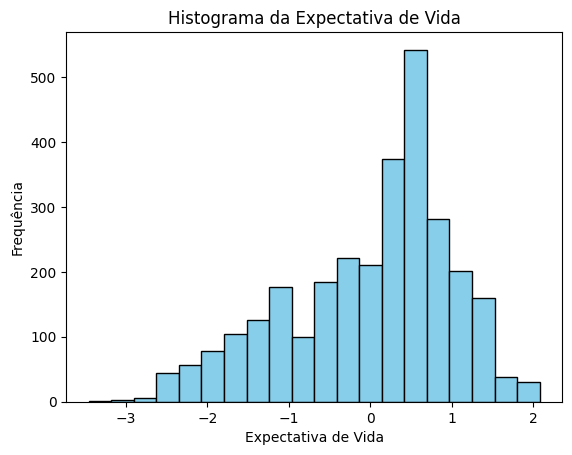

In [16]:
# Criando o histograma
plt.hist(df['Life expectancy'], bins=20, color='skyblue', edgecolor='black')

# Adicionando rótulos e título
plt.xlabel('Expectativa de Vida')
plt.ylabel('Frequência')
plt.title('Histograma da Expectativa de Vida')

##ANALISE DE DADOS

Nesta etapa a ideia é entender a informação que está disponível levando-se em conta algumas estatísticas descritivas para uma possível necessidade de transformação na etapa de preparação de dados. Abaixo foram dispostos alguns comandos bem como suas finalidades.

In [17]:
#Informa a quantidade de atributos e instâncias existentes
print(df.shape)

(2938, 22)


In [18]:
# Informa quais são os tipos de dados dos atributos
print(df.dtypes)

Country                             object
Year                               float64
Status                             float64
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                      float64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                            float64
BMI                                float64
under-five deaths                  float64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object


In [19]:
# Verifica as primeiras linhas do dataset e não foram encontradas inconsistências
df.describe()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2.938000e+03,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2.938000e+03,2938.000000,...,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2.369453e-14,1.233413e-16,0.000128,-0.000375,0.000000,-0.019624,5.320606e-17,-0.107042,2.902149e-17,-0.012049,...,-0.005423,-0.002649,-0.005636,-9.673829e-18,-0.058679,-0.010227,0.008753,0.008346,-0.009392,-0.004486
std,1.000170e+00,1.000170e+00,0.999561,0.998839,1.000170,0.985558,1.000170e+00,1.007555,1.000170e+00,1.002242,...,1.000026,0.967425,1.000254,1.000170e+00,0.932894,0.885175,0.998222,0.997877,1.002607,1.008433
min,-1.629878e+00,-4.593985e-01,-3.457687,-1.318060,-0.257017,-1.767049,-3.714329e-01,-3.189357,-2.110357e-01,-1.862284,...,-3.396093,-2.229185,-3.387365,-3.234448e-01,-0.827823,-0.479363,-1.072469,-1.058164,-2.976073,-3.571075
25%,-7.627743e-01,-4.593985e-01,-0.643224,-0.730634,-0.257017,-0.899100,-3.690756e-01,-0.396359,-2.110357e-01,-0.957869,...,-0.236944,-0.631817,-0.182352,-3.234448e-01,-0.492302,-0.203358,-0.733059,-0.725430,-0.661801,-0.593391
50%,1.043299e-01,-4.593985e-01,0.301932,-0.167348,-0.231573,-0.240113,-3.387736e-01,0.311926,-2.095530e-01,0.233464,...,0.446115,-0.067333,0.450217,-3.234448e-01,-0.393025,-0.162123,-0.325767,-0.326150,0.225020,0.091477
75%,9.714341e-01,-4.593985e-01,0.677369,0.506583,-0.070428,0.729856,-1.492859e-01,0.600825,-1.796149e-01,0.887138,...,0.616880,0.585225,0.618901,-1.855659e-01,-0.164617,-0.046133,0.547126,0.538959,0.722968,0.687013
max,1.621762e+00,2.176759e+00,2.076724,4.491830,15.009326,3.274483,9.429403e+00,0.804604,1.829547e+01,2.443979,...,0.702262,4.668722,0.703244,9.623530e+00,7.828360,21.002167,5.172675,5.263781,1.704457,2.592731


In [20]:
# Verifica se há valores faltantes, discrepantes e/ou inconsistentes
missing_values = df.isnull().sum()
print("Valores faltantes por coluna:")
print(missing_values)

Valores faltantes por coluna:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


In [21]:
# Resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes).
# Filtrar apenas as colunas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [22]:
# Resumo estatístico básico (média, desvio-padrão, mínimo, máximo, etc.)
stats_summary = numeric_df.describe()

In [23]:
# Cálculo da mediana para cada coluna numérica
median_values = numeric_df.median()

In [24]:
# Cálculo da moda para cada coluna numérica
mode_values = numeric_df.mode().iloc[0]

In [25]:
# Contagem de valores ausentes
missing_values = numeric_df.isnull().sum()

In [26]:
# Exibir o resumo completo
print("Resumo Estatístico:")
print(stats_summary)
print("\nMedianas:")
print(median_values)
print("\nModas:")
print(mode_values)
print("\nNúmero de valores ausentes por coluna:")
print(missing_values)

Resumo Estatístico:
               Year        Status  Life expectancy  Adult Mortality  \
count  2.938000e+03  2.938000e+03      2938.000000      2938.000000   
mean   2.369453e-14  1.233413e-16         0.000128        -0.000375   
std    1.000170e+00  1.000170e+00         0.999561         0.998839   
min   -1.629878e+00 -4.593985e-01        -3.457687        -1.318060   
25%   -7.627743e-01 -4.593985e-01        -0.643224        -0.730634   
50%    1.043299e-01 -4.593985e-01         0.301932        -0.167348   
75%    9.714341e-01 -4.593985e-01         0.677369         0.506583   
max    1.621762e+00  2.176759e+00         2.076724         4.491830   

       infant deaths      Alcohol  percentage expenditure  Hepatitis B  \
count    2938.000000  2938.000000            2.938000e+03  2938.000000   
mean        0.000000    -0.019624            5.320606e-17    -0.107042   
std         1.000170     0.985558            1.000170e+00     1.007555   
min        -0.257017    -1.767049           

##PRÉ-PROCESSAMENTO DE DADOS
Nesta etapa a ideia é realizar operações de limpeza, tratamento e preparação dos dados. Como o dataset dispõe da coluna categórica "Country", que não pode ser usada diretamente pelo modelo, optei por usar a operação "one-hot encoding" para transformar a categoria em formato numérico.

In [27]:
# Usando a operação "one-hot encoding" na coluna "Country".
encoded_df = pd.get_dummies(df, columns=['Country'])

In [28]:
# Exibir as primeiras linhas do dataset com as colunas one-hot encoded
print(encoded_df.head())

       Year    Status  Life expectancy  Adult Mortality  infant deaths  \
0  1.621762 -0.459399        -0.443691         0.790238       0.268824   
1  1.404986 -0.459399        -0.979279         0.854614       0.285786   
2  1.188210 -0.459399        -0.979279         0.830473       0.302749   
3  0.971434 -0.459399        -1.021286         0.862660       0.328193   
4  0.754658 -0.459399        -1.052791         0.886801       0.345155   

    Alcohol  percentage expenditure  Hepatitis B   Measles       BMI  ...  \
0 -1.133571               -0.335570    -0.635971 -0.110384 -0.959116  ...   
1 -1.133571               -0.334441    -0.755661 -0.168124 -0.984066  ...   
2 -1.133571               -0.334594    -0.675868 -0.173531 -1.009015  ...   
3 -1.133571               -0.332096    -0.556178  0.032045 -1.033964  ...   
4 -1.133571               -0.367862    -0.516281  0.051757 -1.053924  ...   

   Country_United Republic of Tanzania  Country_United States of America  \
0               

In [29]:
# Tratando/Limpando e padronizando os dados

X = pd.read_csv('https://raw.githubusercontent.com/sandro003/MVP2/refs/heads/main/expectativdevida.csv')

print(X.shape)
print(X.head())

country_col = X[['Country']]
X.drop(['Country'], axis=1, inplace = True)

# OBS: Os dados se mostraram limpos e foram padronizados

(2938, 22)
       Country      Year    Status  Life expectancy  Adult Mortality  \
0  Afghanistan  1.621762 -0.459399        -0.443691         0.790238   
1  Afghanistan  1.404986 -0.459399        -0.979279         0.854614   
2  Afghanistan  1.188210 -0.459399        -0.979279         0.830473   
3  Afghanistan  0.971434 -0.459399        -1.021286         0.862660   
4  Afghanistan  0.754658 -0.459399        -1.052791         0.886801   

   infant deaths   Alcohol  percentage expenditure  Hepatitis B   Measles  \
0       0.268824 -1.133571               -0.335570    -0.635971 -0.110384   
1       0.285786 -1.133571               -0.334441    -0.755661 -0.168124   
2       0.302749 -1.133571               -0.334594    -0.675868 -0.173531   
3       0.328193 -1.133571               -0.332096    -0.556178  0.032045   
4       0.345155 -1.133571               -0.367862    -0.516281  0.051757   

   ...     Polio  Total expenditure  Diphtheria  HIV/AIDS       GDP  \
0  ... -3.268019      

In [30]:
# Carregando o DataFrame como 'df'

# Encontrando linhas com valores nulos em qualquer coluna
null_rows = df[df.isnull().any(axis=1)]

# Exibindo linhas com valores nulos
display(null_rows)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


In [31]:
# Limpando e padronizando os dados

X = pd.read_csv('https://raw.githubusercontent.com/sandro003/MVP2/refs/heads/main/expectativdevida.csv')

print(X.shape)
print(X.head())

country_col = X[['Country']]
X.drop(['Country'], axis=1, inplace = True)

# OBS: Os dados se mostraram limpos e foram padronizados

(2938, 22)
       Country      Year    Status  Life expectancy  Adult Mortality  \
0  Afghanistan  1.621762 -0.459399        -0.443691         0.790238   
1  Afghanistan  1.404986 -0.459399        -0.979279         0.854614   
2  Afghanistan  1.188210 -0.459399        -0.979279         0.830473   
3  Afghanistan  0.971434 -0.459399        -1.021286         0.862660   
4  Afghanistan  0.754658 -0.459399        -1.052791         0.886801   

   infant deaths   Alcohol  percentage expenditure  Hepatitis B   Measles  \
0       0.268824 -1.133571               -0.335570    -0.635971 -0.110384   
1       0.285786 -1.133571               -0.334441    -0.755661 -0.168124   
2       0.302749 -1.133571               -0.334594    -0.675868 -0.173531   
3       0.328193 -1.133571               -0.332096    -0.556178  0.032045   
4       0.345155 -1.133571               -0.367862    -0.516281  0.051757   

   ...     Polio  Total expenditure  Diphtheria  HIV/AIDS       GDP  \
0  ... -3.268019      

Análise Exploratória de Dados

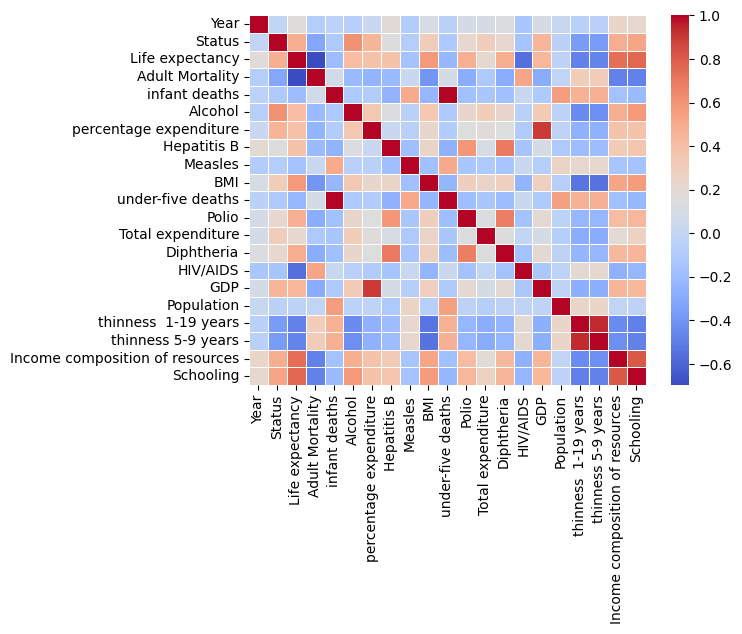

In [32]:
 # Visualizando a matriz de correlação e o vetor de correlação com a expectativa de vida
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.show()


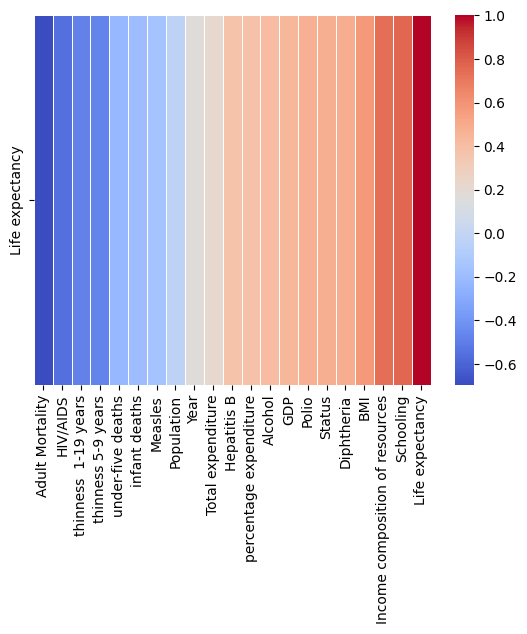

In [33]:
sns.heatmap(corr_matrix[['Life expectancy']].sort_values(by='Life expectancy').T, annot=False, cmap='coolwarm', linewidths=0.5)
plt.show()

In [34]:
print(corr_matrix[['Life expectancy']].sort_values(by='Life expectancy'))

                                 Life expectancy
Adult Mortality                        -0.696561
HIV/AIDS                               -0.555889
thinness  1-19 years                   -0.481332
thinness 5-9 years                     -0.475448
under-five deaths                      -0.222293
infant deaths                          -0.196353
Measles                                -0.157428
Population                             -0.027582
Year                                    0.169590
Total expenditure                       0.216871
Hepatitis B                             0.374444
percentage expenditure                  0.381160
Alcohol                                 0.414547
GDP                                     0.443216
Polio                                   0.470382
Status                                  0.481376
Diphtheria                              0.484297
BMI                                     0.570549
Income composition of resources         0.741218
Schooling           

In [35]:
# Criando Diagrama de dispersão de álcool e expectativa de vida
vida = pd.read_csv('https://raw.githubusercontent.com/sandro003/MVP2/refs/heads/main/expectativdevida.csv')

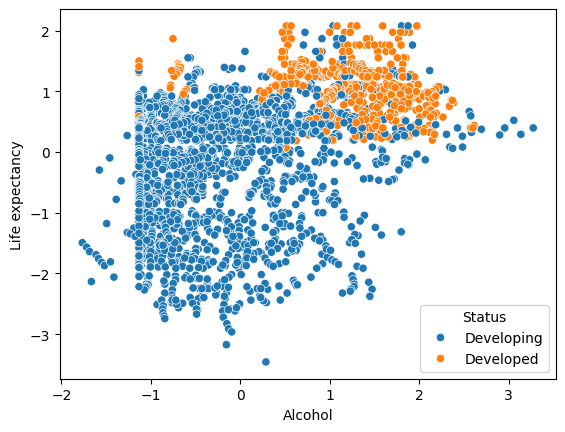

In [36]:
vida_with_status = vida.copy()
vida_with_status.Status = vida.Status.map({-0.4593985099361714: "Developing", 2.1767593459085: "Developed"})
sns.scatterplot(data = vida_with_status, x = "Alcohol", y = "Life expectancy", hue = "Status")
plt.show()

Verificação de outliers - Após as transformação, verifiquei novamente se há outliers que possam ter surgido com as novas variáveis.

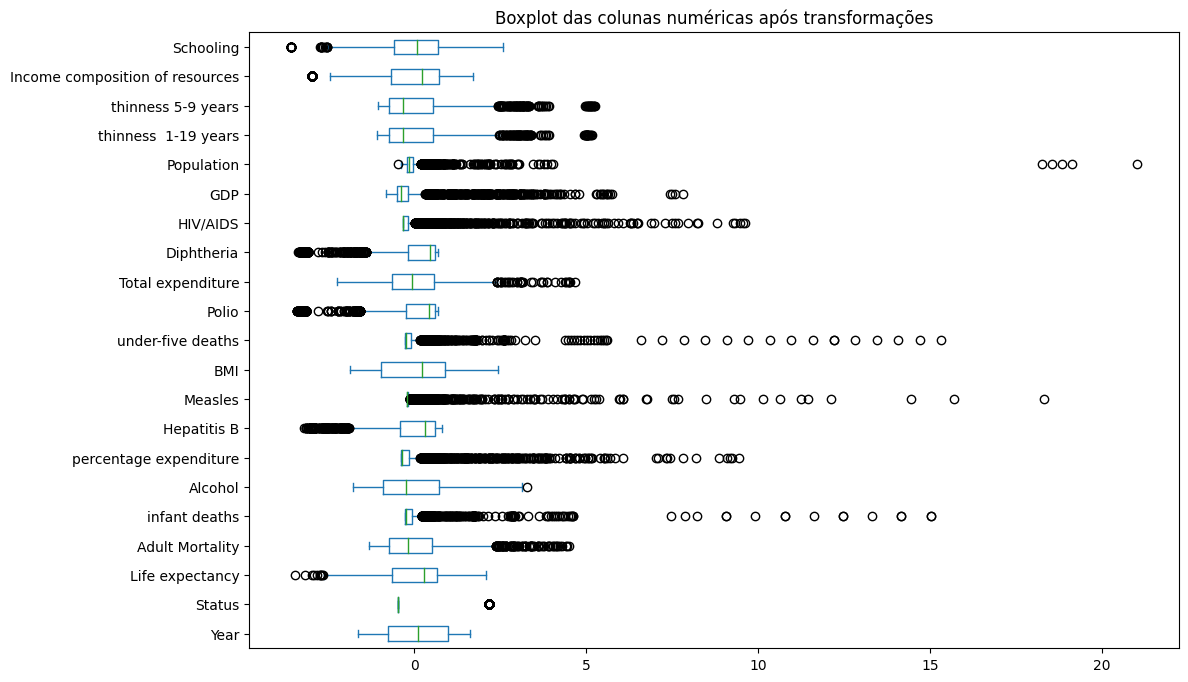

In [37]:
# Gerar boxplot novamente para verificar outliers
df[numeric_df.columns].plot(kind='box', figsize=(12, 8), vert=False)
plt.title("Boxplot das colunas numéricas após transformações")
plt.show()

##AUTOAVALIAÇÃO

Neste MVP deparei com algumas situações que até então nem se quer imaginava que teria e vou tentar contextualizar abaixo bem como algumas dores operacionais que tive.

1- Da definição do problema - tive muita dificuldade para encontrar o dataset correto pois, como estou iniciando, ainda tenho dificuldade para contar uma história com os meus dados e por isso perdi muito mais tempo coletando do que analisando os mesmos.

2- Uma vez com algumas perguntas elencadas fui buscar uma base de dados confiável e segura e optei por seguir a indicação do curso.

3- Baixei o arquivo csv localmente e depois subi para o notebook de forma manual.

4- Por fim, consegui determinar que existe sim a correlação entre consumo de álcool e a expectativa de vida e isso se deve ao fato de que países mais desenvolvidos tendem a consumir mais álcool. Em função disso alguns países tem adotado a Lei Seca para minimizar os danos causados à sociedadde pela ingestão exessiva de álcool.

##BIBLIOGRAFIA:

Engenharia de Dados: o que é, o que faz e um Guia completo. Alura, 2023. Disponível em: https://www.alura.com.br/artigos/engenharia-dados?srsltid=AfmBOorWZVr2iVRqWcdb_6UGxSMEo0bEje0oltL2ydb8COmuYBDUr43E. Acesso em: 08/08/2024.

Análise Exploratória: primeiros passos | Alura. Alura, 2020. Disponível em: https://www.alura.com.br/artigos/analise-exploratoria?srsltid=AfmBOoq-dS3MUBDAaLrzw7QccXQAqhhtfmdXZ4sEOEdZMGHRrTzk5bdB. Acesso em: 11/08/2024.

Introdução à Ciência de Dados (Data Science): Didática Tech. Youtube, 2022. Disponível em: https://www.youtube.com/watch?v=sjpBNi4DgI0. Acesso em: 06/09/2024

Como criar um projeto de Data Science do zero para seu Portfólio | Hipsters: Portfólio Dev. Youtube, 2024. Disponível em: https://www.youtube.com/watch?v=hV3ORe7F8Q4. Acesso em: 09/09/2024

Cleaned Countries Life Expectancy Dataset. Kaggle, 2021. Disponível em: https://www.kaggle.com/datasets/paperxd/cleaned-life-expectancy-dataset/data. Acesso em: 16/09/2024.